<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# EDA Walkthrough

_Authors: Kiefer Katovich (SF), David Yerrington (SF), Riley Dallas (AUS), Adi Bronshtein (Live Online)_

---

The dataset for today's lesson (`Heart.csv`) comes from the book, [An Introduction to Statistical Learning (ISLR)](https://www.statlearning.com/). It's comprised of diagnostic measurements for 303 patients to determine whether or not they have heart disease (the `AHD` column).

Though in many if not most cases the EDA procedure will be considerably more involved, this should give you an idea of the basic workflow a data scientist would use when working with a new dataset.

By now we know that data cleaning and data exploration are a very important part of any Data Scientist job. Some estimations put it at 80% of the time Data Scientist spends on a project. The other 20\%? Well...   
![](./imgs/clean_data_borat.png)

### Learning Objectives

- Quickly describe a dataset, including data types, missing values and basic descriptive statistics
- Rename columns (series) in a DataFrame
- Visualize data distributions with box plots
- Calculate and visualize correlation

**The Data Science Workflow**
![](./imgs/data-science-workflow.png)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Load the data

---

Import the CSV into a pandas DataFrame.

In [2]:
file_path = './datasets/Heart.csv'

In [4]:
heart = pd.read_csv(file_path)
heart.head(8)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,0
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,1
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,0


## Describe the basic format of the data and the columns

---

Use the `.head()` method (and optionally pass in an integer for the number of rows you want to see) to get a glimpse of your dataset. This is a good initial step to get a feel for what is in the CSV and what problems may be present.

The `.dtypes` attribute tells you the data type for each of your columns.

In [6]:
# Print out the first 8 rows:
heart.head(8)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,0
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,1
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,0


In [10]:
# Look at the dtypes of the columns:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    object 
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


## Drop unwanted columns

---

It looks like `Unnamed: 0` is an index. This is redundant, since `pandas` automatically creates an index for us (the bold numbers to the left of the DataFrame).

The `.drop()` method can be used to get rid of a column like so:

```python
df.drop(columns=['list', 'columns', 'to', 'drop'], inplace=True)
```

The `inplace=True` parameter makes our change permanent.

In [16]:
# print out the index object and the first 20 items in the DataFrame's index 
# to see that we have these row numbers already:
heart['Unnamed: 0'].head(20)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: Unnamed: 0, dtype: int64

In [5]:
# Remove the unneccesary column:
# heart = heart.drop(columns=['Unnamed: 0'])
heart.drop(columns = ['Unnamed: 0'], inplace = True)

## Clean corrupted column

---

From the previous step, we noticed the `Age` column was interpreted as a string, even though the values are integers.

It is pretty common to have numeric columns represented as strings in your data if some of the observations are corrupted. It is important to always check the data types of your columns.

![](./imgs/data-cleaning.jpg)


**What is causing the `Age` column to be encoded as a string?**

In [23]:
## one way to find errors in a column
heart['Age'].sort_values(ascending=False)

62      ?
92      ?
198     ?
207     ?
121     ?
       ..
168    35
283    35
101    34
225    34
132    29
Name: Age, Length: 303, dtype: object

In [26]:
# #Using value_counts: What values appear in this column? How many times do they occur?
heart['Age'].value_counts().head(20)

58    17
57    17
54    16
59    13
51    12
52    12
60    12
44    11
56    11
41    10
64    10
?      9
62     9
67     9
42     8
43     8
55     8
63     8
65     8
53     8
Name: Age, dtype: int64

In [27]:
## Use the .unique() method
heart["Age"].unique()


array(['63', '67', '37', '41', '56', '62', '57', '53', '44', '52', '48',
       '54', '49', '64', '58', '60', '50', '?', '66', '43', '40', '69',
       '59', '42', '55', '61', '65', '71', '51', '46', '45', '39', '68',
       '47', '34', '35', '29', '70', '77', '38', '74', '76'], dtype=object)

In [29]:
# similar to .unique() you can use a set to pull all the unique values
print(set(heart["Age"]))

{'57', '74', '61', '59', '34', '47', '62', '63', '50', '56', '67', '52', '48', '29', '55', '43', '54', '65', '53', '51', '68', '70', '77', '49', '46', '44', '37', '60', '76', '39', '45', '38', '?', '69', '64', '35', '71', '66', '40', '58', '42', '41'}


In the cell below, replace all "?" cells with `np.nan`.

In [51]:
[np.nan if age == '?' else float(age) for age in heart["Age"]]

[63.0,
 67.0,
 67.0,
 37.0,
 41.0,
 56.0,
 62.0,
 57.0,
 63.0,
 53.0,
 57.0,
 56.0,
 56.0,
 44.0,
 52.0,
 57.0,
 48.0,
 54.0,
 48.0,
 49.0,
 64.0,
 58.0,
 58.0,
 58.0,
 60.0,
 50.0,
 nan,
 66.0,
 43.0,
 40.0,
 69.0,
 60.0,
 64.0,
 59.0,
 44.0,
 42.0,
 43.0,
 57.0,
 55.0,
 61.0,
 65.0,
 40.0,
 71.0,
 59.0,
 61.0,
 58.0,
 51.0,
 50.0,
 65.0,
 53.0,
 41.0,
 65.0,
 44.0,
 44.0,
 60.0,
 54.0,
 50.0,
 41.0,
 54.0,
 51.0,
 51.0,
 46.0,
 nan,
 54.0,
 54.0,
 60.0,
 60.0,
 54.0,
 59.0,
 46.0,
 65.0,
 67.0,
 62.0,
 65.0,
 44.0,
 65.0,
 60.0,
 51.0,
 48.0,
 58.0,
 45.0,
 53.0,
 39.0,
 68.0,
 52.0,
 44.0,
 47.0,
 53.0,
 53.0,
 51.0,
 66.0,
 62.0,
 nan,
 44.0,
 63.0,
 52.0,
 59.0,
 60.0,
 52.0,
 48.0,
 45.0,
 34.0,
 57.0,
 71.0,
 49.0,
 54.0,
 59.0,
 57.0,
 61.0,
 39.0,
 61.0,
 56.0,
 52.0,
 43.0,
 62.0,
 41.0,
 58.0,
 35.0,
 63.0,
 65.0,
 48.0,
 nan,
 51.0,
 55.0,
 65.0,
 45.0,
 56.0,
 54.0,
 44.0,
 62.0,
 54.0,
 51.0,
 29.0,
 51.0,
 43.0,
 55.0,
 70.0,
 62.0,
 35.0,
 51.0,
 59.0,
 59.0,
 52.0,
 64

In [6]:
#in class code

# ## Using the .replace() method to change these values as well
# heart['Age'].replace("?",np.nan, inplace = True) ## inplace = True makes this permanent
# heart['Age'] = heart['Age'].astype(float) ## convert to float and overwrite column

# We can do both of these steps at once
heart['Age'] = heart['Age'].replace("?", np.nan).astype(float)

In [52]:
def replace_value(value):
    age_output= []
    for i in value:
        if i == '?':
            age_output.append(np.nan)
        else:
            age_output.append(float(i))
    return age_output
replace_value(heart["Age"])


[63.0,
 67.0,
 67.0,
 37.0,
 41.0,
 56.0,
 62.0,
 57.0,
 63.0,
 53.0,
 57.0,
 56.0,
 56.0,
 44.0,
 52.0,
 57.0,
 48.0,
 54.0,
 48.0,
 49.0,
 64.0,
 58.0,
 58.0,
 58.0,
 60.0,
 50.0,
 nan,
 66.0,
 43.0,
 40.0,
 69.0,
 60.0,
 64.0,
 59.0,
 44.0,
 42.0,
 43.0,
 57.0,
 55.0,
 61.0,
 65.0,
 40.0,
 71.0,
 59.0,
 61.0,
 58.0,
 51.0,
 50.0,
 65.0,
 53.0,
 41.0,
 65.0,
 44.0,
 44.0,
 60.0,
 54.0,
 50.0,
 41.0,
 54.0,
 51.0,
 51.0,
 46.0,
 nan,
 54.0,
 54.0,
 60.0,
 60.0,
 54.0,
 59.0,
 46.0,
 65.0,
 67.0,
 62.0,
 65.0,
 44.0,
 65.0,
 60.0,
 51.0,
 48.0,
 58.0,
 45.0,
 53.0,
 39.0,
 68.0,
 52.0,
 44.0,
 47.0,
 53.0,
 53.0,
 51.0,
 66.0,
 62.0,
 nan,
 44.0,
 63.0,
 52.0,
 59.0,
 60.0,
 52.0,
 48.0,
 45.0,
 34.0,
 57.0,
 71.0,
 49.0,
 54.0,
 59.0,
 57.0,
 61.0,
 39.0,
 61.0,
 56.0,
 52.0,
 43.0,
 62.0,
 41.0,
 58.0,
 35.0,
 63.0,
 65.0,
 48.0,
 nan,
 51.0,
 55.0,
 65.0,
 45.0,
 56.0,
 54.0,
 44.0,
 62.0,
 54.0,
 51.0,
 29.0,
 51.0,
 43.0,
 55.0,
 70.0,
 62.0,
 35.0,
 51.0,
 59.0,
 59.0,
 52.0,
 64

## Determine how many observations are missing

---

Having replaced the question marks with `np.nan` values, we know that there are some missing observations for the `Age` column. 

When we start to build models with data, null values in observations are (almost) never allowed. It is important to always see how many observations are missing for each column.

We can count the null values for each column like so:

```python
df.isnull().sum()
```

The `.isnull()` method will convert the columns to `True` and `False` values.

The `.sum()` method will then sum these boolean columns, and the total number of null values per column will be returned.

In [56]:

heart.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

The .mean() method will then average these boolean columns, and the proportion (or percentage) of null values per column will be returned.

In [57]:
heart.isnull().mean()

Age          0.000000
Sex          0.000000
ChestPain    0.000000
RestBP       0.000000
Chol         0.000000
Fbs          0.000000
RestECG      0.000000
MaxHR        0.000000
ExAng        0.000000
Oldpeak      0.000000
Slope        0.000000
Ca           0.013201
Thal         0.006601
AHD          0.000000
dtype: float64

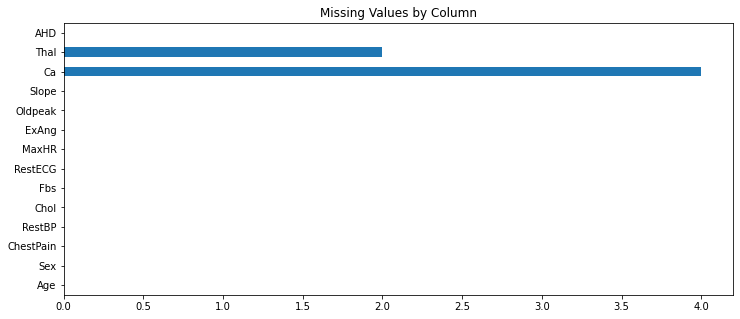

In [ ]:

plt.figure(figsize = (12, 5))
heart.isnull().sum().plot(kind = "barh");
plt.title("Missing Values by Column");



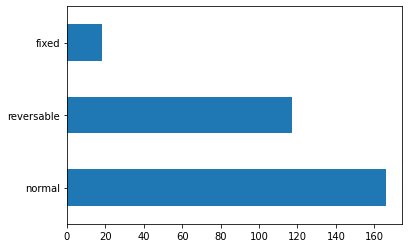

In [60]:
heart["Thal"].value_counts().plot(kin = 'barh');

**Drop the null values.** 

In this case, lets keep it simple and just drop the rows from the dataset that contain null values. If a column has a ton of null values it often makes more sense to drop the column entirely instead of the rows with null values.

The `.dropna()` function will drop any rows that have _**ANY**_ null values for you.  Use this carefully as you could drop many more rows than expected.

In [62]:
heart.dropna().head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [66]:
heart.dropna().shape


(297, 14)

In [69]:
##If we **temporarily drop NAs, how many missing values remain?
heart.dropna().isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [71]:
## Filtering a df to remove rows with NAs in a specific Column
heart.loc[heart["Age"].notnull(), :]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,1
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,1
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,1
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,1


## Make the column names more descriptive
---

One minor annoyance is that our column names are not at all intuitive. 

Let's rename them! 

There are two popular methods to renaming columns.

1. Using a _dictionary substitution_, which is very useful if you only want to rename a few columns. 
2. Using a _list replacement_, which is quicker than writing out a dictionary, but requires a full list of names.

We'll explore both options in the cells below.

In [76]:
# List Replacement Method
new_columns_list = [
    'age',
    'sex_male',
    'chest_pain',
    'resting_blood_pressure',
    'cholesterol',
    'fasting_blood_sugar',
    'resting_ecg',
    'max_heart_rate',
    'exercise_induced_angina',
    'old_peak',
    'slope',
    'ca',
    'thallium_stress_test',
    'has_heart_disease',
]

heart.columns = new_columns_list
heart

,age,sex_male,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,thallium_stress_test,has_heart_disease
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,1
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,1
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,1
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,1


In [7]:
# Dictionary Method
new_columns_dict = {
    'Age': 'age',
    'Sex': 'sex_male',
    'ChestPain': 'chest_pain',
    'RestBP': 'resting_blood_pressure',
    'Chol': 'cholesterol',
    'Fbs': 'fasting_blood_sugar',
    'RestECG': 'resting_ecg',
    'MaxHR': 'max_heart_rate',
    'ExAng': 'exercise_induced_angina',
    'Oldpeak': 'old_peak',
    'Slope': 'slope',
    'Ca': 'ca',
    'Thal': 'thallium_stress_test',
    'AHD': 'has_heart_disease',
}

In [8]:
## One way to use .rename() is to overwrite the dataframe
# heart = heart.rename(columns = new_columns_dict)

## Another way is to use inplace = True
heart.rename(columns = new_columns_dict, inplace = True)

## Describe the summary statistics for the columns
---

<img src="https://snag.gy/07JFa5.jpg" width="350">

---

![](./imgs/sad-panda.png)

---
The `.describe()` function gives summary statistics for each of your columns. What are some, if any, oddities you notice about the columns based on this output?

In [79]:
heart.describe()

,sex_male,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,has_heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.458746
std,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.499120
min,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [80]:
heart.describe(include = "all")

,age,sex_male,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,thallium_stress_test,has_heart_disease
count,303,303.000000,303,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301,303.000000
unique,42,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,58,NaN,asymptomatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN
freq,17,NaN,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166,NaN
mean,NaN,0.679868,NaN,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,NaN,0.458746
std,NaN,0.467299,NaN,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,NaN,0.499120
min,NaN,0.000000,NaN,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000
25%,NaN,0.000000,NaN,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000
50%,NaN,1.000000,NaN,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,NaN,0.000000
75%,NaN,1.000000,NaN,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,NaN,1.000000


You can also use `.groupby()` + `.describe()` for cohort analysis

In [84]:
heart.groupby('has_heart_disease').describe().T.head()

has_heart_disease           0           1
sex_male count     164.000000  139.000000
         mean        0.560976    0.820144
         std         0.497788    0.385457
         min         0.000000    0.000000
         25%         0.000000    1.000000

In [87]:
heart.groupby('has_heart_disease')[['age', 'cholesterol', 'max_heart_rate']].describe().T

has_heart_disease              0           1
cholesterol    count  164.000000  139.000000
               mean   242.640244  251.474820
               std     53.456580   49.486835
               min    126.000000  131.000000
               25%    208.750000  217.500000
               50%    234.500000  249.000000
               75%    267.250000  283.500000
               max    564.000000  409.000000
max_heart_rate count  164.000000  139.000000
               mean   158.378049  139.258993
               std     19.199080   22.593233
               min     96.000000   71.000000
               25%    148.750000  125.000000
               50%    161.000000  142.000000
               75%    172.000000  156.500000
               max    202.000000  195.000000

In [89]:
list_of_columns = ['age', 'cholesterol', 'max_heart_rate']

heart.groupby('has_heart_disease')[list_of_columns].describe().T


has_heart_disease              0           1
cholesterol    count  164.000000  139.000000
               mean   242.640244  251.474820
               std     53.456580   49.486835
               min    126.000000  131.000000
               25%    208.750000  217.500000
               50%    234.500000  249.000000
               75%    267.250000  283.500000
               max    564.000000  409.000000
max_heart_rate count  164.000000  139.000000
               mean   158.378049  139.258993
               std     19.199080   22.593233
               min     96.000000   71.000000
               25%    148.750000  125.000000
               50%    161.000000  142.000000
               75%    172.000000  156.500000
               max    202.000000  195.000000

## Plot variables with potential outliers using boxplots.

---

Here we will use the seaborn package to plot boxplots of the variables we have identified as potentially having outliers.

Some notes on seaborn's boxplot keyword argument options:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent

There are more keyword arguments available but those are most relevant for now.

_If you want to check out more, place your cursor in the `boxplot` argument bracket and press `shift+tab` (Press four times repeatedly to bring up detailed documentation)._  

**How to read a box plot**:
![](./imgs/boxplot.png)    

In [92]:
# age
heart['age'].describe()

count     303
unique     42
top        58
freq       17
Name: age, dtype: object

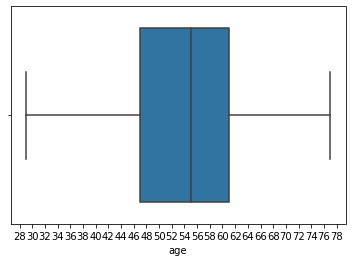

In [9]:
## age boxplot
sns.boxplot( x = heart["age"]);
plt.xticks(range(28,80,2));

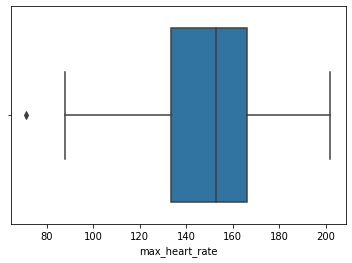

In [10]:
# max heart rate
sns.boxplot(x = heart['max_heart_rate']);

In [11]:
heart[heart['max_heart_rate'] == 71]

,age,sex_male,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,thallium_stress_test,has_heart_disease
245,67.0,1,asymptomatic,120,237,0,0,71,0,1.0,2,0.0,normal,1


## Correlation matrices

---

A great way to easily get a feel for linear relationships between your variables is with a correlation matrix.

Below is the formula for the correlation between two variables $X$ and $Y$:

#### Correlation

$$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

![](./imgs/correlation_examples.png)

#### The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using the `.corr()` method.

It's useful to get a feel for which columns are correlated. The `.corr() method` can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

In [16]:
# A:
heart.corr()[['has_heart_disease']]

,has_heart_disease
age,0.228794
sex_male,0.276816
resting_blood_pressure,0.150825
cholesterol,0.085164
fasting_blood_sugar,0.025264
resting_ecg,0.169202
max_heart_rate,-0.417167
exercise_induced_angina,0.431894
old_peak,0.424510
slope,0.339213


It can be difficult to spot any outliers simply by staring at our correlation matrix. To help get around this issue, let's use Seaborn's `.heatmap()` to give our correlation matrix some color.

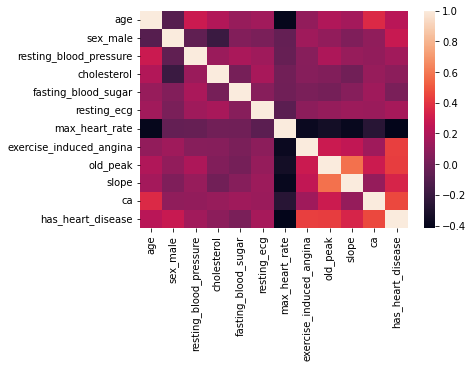

In [18]:
# A:
corr = heart.corr()
sns.heatmap(corr);

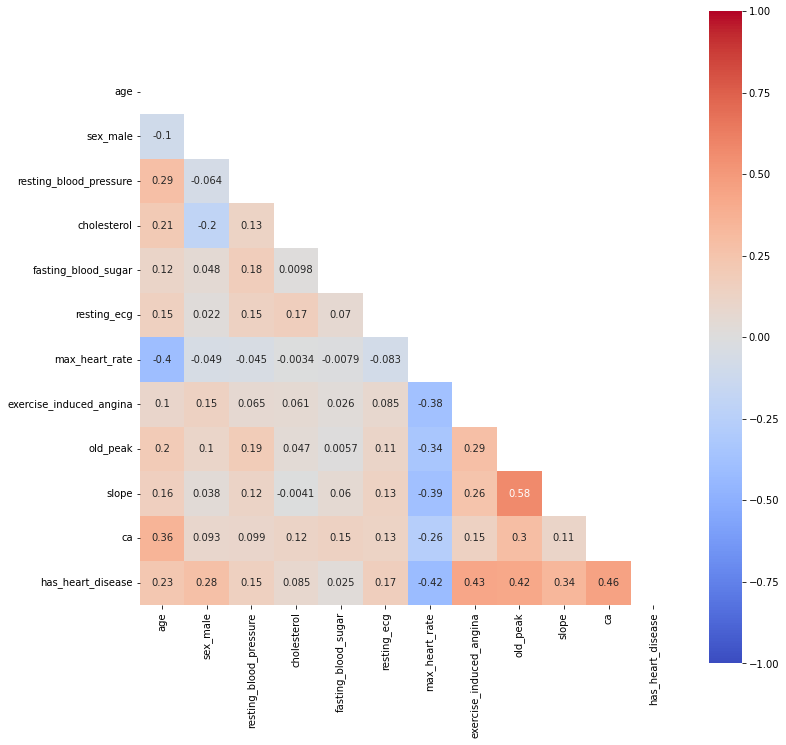

In [21]:
corr = heart.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, square=True, mask = mask,
           vmin = -1, vmax = 1);

**What have we done today?**
1. Described a dataset, including data types, missing values (and handled those missing values!) and basic descriptive statistics
1. "Cleaned" the dataset - dropped unwanted columns, renamed columns (series) in a DataFrame (to make them more descriptive), fix corrupted columns 
1. Visualized data distributions with box plots
1. Calculated and visualized correlation